In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Warmup Exersize

In [2]:
# a unity matrix of order 5 (5*5)
def WarmUpExercise():
    A = np.identity(5)
    return A

WarmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## LR with one variable

In [3]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
#split X and Y
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = data[:,1]

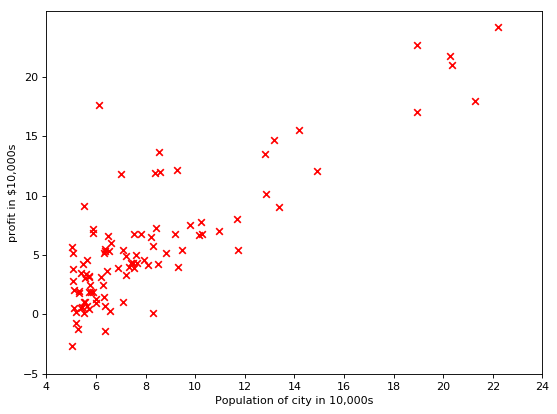

In [4]:
fig = plt.figure(figsize=(8,6), dpi=80)
plt.scatter(X[:,1], y, c="r", marker="x")
plt.xlabel("Population of city in 10,000s")
plt.ylabel("profit in $10,000s")
plt.xticks(np.arange(4,25,2))
plt.yticks(np.arange(-5,25,5))
plt.show()

In [5]:
#we need to minimize the cost funtion
#cost funtion & Gradient descent
def computeCost(X, y, theta):
    X = np.c_[np.ones(data.shape[0]),data[:,0]]
    m = y.size
    n = X.shape[1]
    theta = np.reshape(theta,(n,1))
    h = X.dot(theta)
    cost_func_list = []
    for i in range(m):
        cost_func_list.append(np.square(h.ravel()[i]-y[i]))
    return np.sum(cost_func_list)/(2*m)

In [6]:
J = computeCost(X, y, theta=[[0],[0]])
print('With theta = [0 ; 0] \nCost computed = ', J)
print('Expected cost value (approx) 32.07\n')

With theta = [0 ; 0] 
Cost computed =  32.072733877455676
Expected cost value (approx) 32.07



In [7]:
J = computeCost(X, y, theta=[[-1],[2]])
print('\nWith theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 54.24\n')


With theta = [-1 ; 2]
Cost computed = 54.24245508201238
Expected cost value (approx) 54.24



### Gradient Descent

In [8]:
def GradientDescent(X,y,theta,alpha,num_itern):
    m = y.size
    n = X.shape[1]
    J_history = []
    theta = np.reshape(theta,(n,1))
    for i in range(num_itern):
        theta1 = theta[0][0]
        theta2 = theta[1][0]
        s1 = []
        s2 = []
        for j in range(m):
            h = X.dot(theta)
            s1.append(X[j][0]*(h[j][0]-y[j]))
            s2.append(X[j][1]*(h[j][0]-y[j]))
            
        temptheta1 = theta1
        temptheta2 = theta2
        theta1 = temptheta1 - alpha*(np.sum(s1)/m)
        theta2 = temptheta2 - alpha*(np.sum(s2)/m)
        theta = [[theta1],[theta2]]
        J_history.append(computeCost(X, y, theta))
    return (theta, J_history)

[[-3.6302914394043597], [1.166362350335582]]


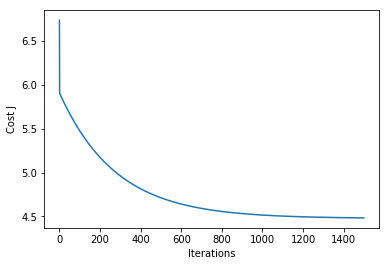

In [9]:
theta = np.zeros((2,1))
alpha = .01
num_itern = 1500
theta, J = GradientDescent(X,y,theta, .01, 1500)
print(theta)
plt.plot(J)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

In [10]:
theta0 = theta[0][0]
theta1 = theta[1][0]
XX = np.arange(5,25) # range of X values lies between 5,25
YY = theta0+theta1*XX

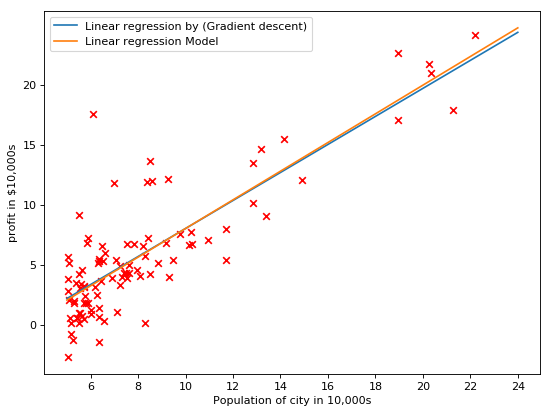

In [11]:
fig = plt.figure(figsize=(8,6), dpi=80)
plt.scatter(X[:,1], y, c="r", marker="x")
plt.plot(XX,YY, label='Linear regression by (Gradient descent)')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("profit in $10,000s")
plt.xticks(np.arange(4,25,2))
plt.yticks(np.arange(-5,25,5))

#plot using linear regression
import sklearn
from sklearn.linear_model import LinearRegression as LR
lin_reg = LR()
lin_reg.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(XX, lin_reg.intercept_+lin_reg.coef_*XX, label='Linear regression Model')
plt.legend(loc = 'upper left')
plt.show()

In [12]:
theta = np.asarray(theta)

In [13]:
print(theta.T.dot([1, 35000]))
print(theta.T.dot([1, 70000]))

[40819.05197031]
[81641.73423205]


### Optional (LR with multiple variables)
### Feature Normalization and Geadient Descent

In [14]:
data1 = np.loadtxt("ex1data2.txt",  delimiter=',')

In [15]:
x1 = data1[:,0]
x2 = data1[:,1]
y = data1[:,2]
mu = [np.mean(x1), np.mean(x2), np.mean(y) ]
std = [np.std(x1), np.std(x2), np.std(y)]

In [16]:
x1 = (x1-mu[0])/std[0]
x2 = (x2-mu[1])/std[1]
y = (y-mu[2])/std[2]

In [17]:
data1 = np.stack([x1, x2, y], axis=1)

In [18]:
def computeCostMulti(X, y, theta):
    X = np.c_[np.ones(data1.shape[0]),data1]
    n = X.shape[1]
    theta = np.reshape(theta,(n,1))
    m = y.size
    h = X.dot(theta)
    cost_func_list = []
    for i in range(m):
        cost_func_list.append(np.square(h[i][0]-y[i]))
    return np.sum(cost_func_list)/(2*m)

In [19]:
J = computeCostMulti(X, y, theta=[[0],[0],[0],[0]])

In [20]:
def NormalEqn(X,y):
    X = np.c_[np.ones(data1.shape[0]),data1]
    theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
    return(theta)